Initially, we do some using normal images.

Template Matching

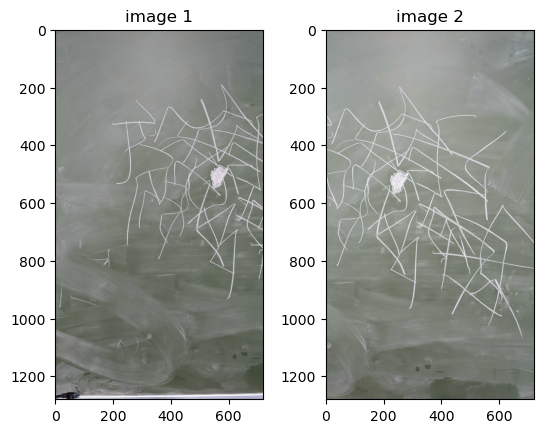

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "D:\\courses\\IC201P design practicum\\Before Pre-open house\\Similar region\\"
name1 = "image 1.jpeg"
name2 = "image 2.jpeg"

img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )

axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )

plt.show ()

In [3]:
def individual_template_matching(img1, point, img2, w):
    x, y = point
    
    # Define the template from img1
    template = img1[y-w//2:y+w//2+1, x-w//2:x+w//2+1]
    
    # Perform template matching
    result = cv2.matchTemplate(img2, template, cv2.TM_CCOEFF_NORMED)
    _, _, min_loc, max_loc = cv2.minMaxLoc(result)
    
    # Get the top-left and bottom-right coordinates of the matched area
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + w)
    
    # Draw a red rectangle in img2 around the matched area
    img2 = cv2.rectangle(img2, top_left, bottom_right, (0, 0, 255), 2)
    
    # redden the area in img1,
    red_filter = np.zeros_like(template)
    red_filter[:, :, 2] = 50  # Increase the red channel by 50

    # Apply red color filter to cropped image
    red_cropped_img1 = cv2.addWeighted( template , 1, red_filter , 1 , 0 )
    img1 [y-w//2:y+w//2+1, x-w//2:x+w//2+1] = red_cropped_img1
    
    return img1, img2


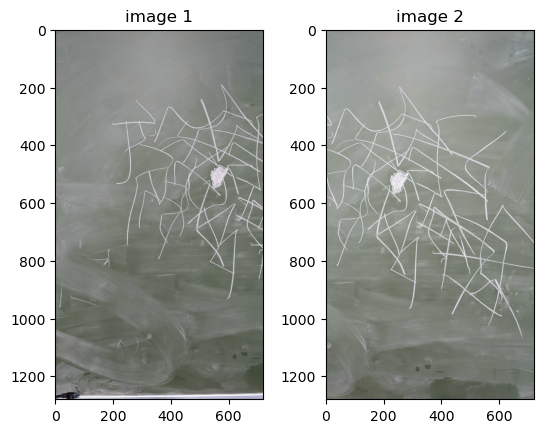

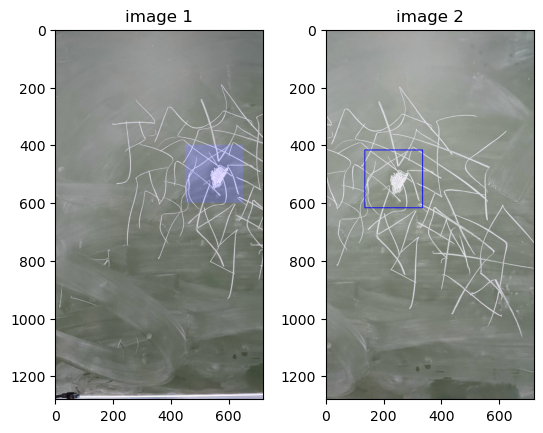

In [4]:
img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

# Define the point coordinates and window size
point = (550,500)
w = 200

# previous images
fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )

axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )

plt.show ()

# Perform template matching and display the result
new_img1 , new_img2 = individual_template_matching(img1, point, img2, w)
# new images

fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( new_img1 )
axs[0].set_title ( "image 1" )

axs[1].imshow ( new_img2 )
axs[1].set_title ( "image 2" )

plt.show ()

Common region

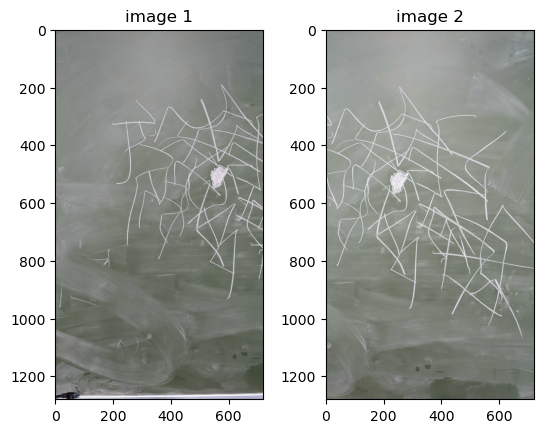

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# read the images
path = "D:\\courses\\IC201P design practicum\\Before Pre-open house\\Similar region\\"
name1 = "image 1.jpeg"
name2 = "image 2.jpeg"

img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )

axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )

plt.show ()

In [7]:
def common_area ( img1 , img2 , h , v ):
    # get the template from the middle right end of img1
    template1 = img1[img1.shape[0]//2-v:img1.shape[0]//2+v, img1.shape[1]-h:]
    # perform template matching on img2
    result = cv2.matchTemplate(img2, template1, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    # get the matched template location in img2
    top_left = max_loc
    bottom_right = (top_left[0] + h, top_left[1] + v)
    matched_template2 = img2[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    x2 = bottom_right[0]
    
    # get the template from the left middle side of img2
    template2 = img2[img2.shape[0]//2-v:img2.shape[0]//2+v, :h]
    
    # draw a red rectangle around the matched template in img2
    cv2.rectangle(img2, top_left, bottom_right, (0, 0, 255), 2)
    # perform template matching on img1
    result = cv2.matchTemplate(img1, template2, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    # get the matched template location in img1
    top_left = max_loc
    bottom_right = (top_left[0] + h, top_left[1] + v)
    matched_template1 = img1[top_left[1]:bottom_right[1], top_left[0]:bottom_right[0]]
    
    x1 = top_left[0]
    # draw a red rectangle around the matched template in img1
    cv2.rectangle(img1, top_left, bottom_right, (0, 0, 255), 2)
    # return the edited images img1 and img2
    # ---------- # to make red now.
    # for image 2,
    # make matched area red.
    template22 = img2[:, :x2]
    # redden the area in img2,
    red_filter = np.zeros_like(template22)
    red_filter[:, :, 2] = 50  # Increase the red channel by 50
    # Apply red color filter to cropped image
    red_cropped_img2 = cv2.addWeighted( template22 , 1, red_filter , 1 , 0 )
    img2 [:, :x2] = red_cropped_img2
    
    # for image 1,
    # make matched area red.
    template11 = img1[:, x1:]
    # redden the area in img1,
    red_filter = np.zeros_like(template11)
    red_filter[:, :, 2] = 50  # Increase the red channel by 50
    # Apply red color filter to cropped image
    red_cropped_img1 = cv2.addWeighted( template11 , 1, red_filter , 1 , 0 )
    img1 [:, x1:] = red_cropped_img1
    
    return img1, img2, x1, x2

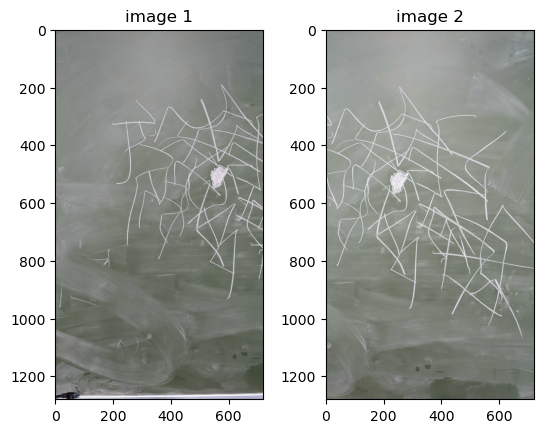

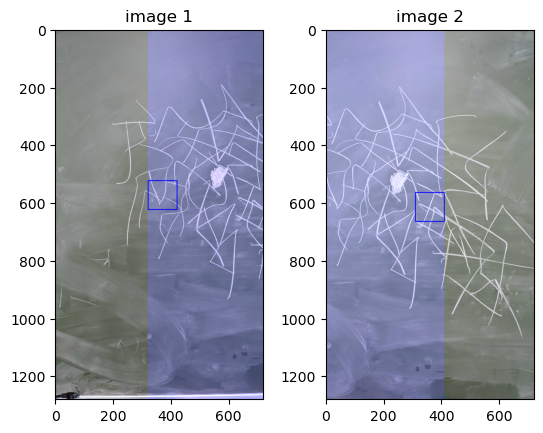

In [8]:
img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

# first plot the img1 and img2, then plot new_img1 and new_img2

# plot img1 and img2

fig , axs = plt.subplots ( 1,2 )
axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )
axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )
plt.show ()

h , v = 100, 100

# plot new_img1 and new_img2
new_img1 , new_img2 , x1 , x2 = common_area ( img1 , img2 , h = h , v = v )

fig , axs = plt.subplots ( 1,2 )
axs[0].imshow ( new_img1 )
axs[0].set_title ( "image 1" )
axs[1].imshow ( new_img2 )
axs[1].set_title ( "image 2" )
plt.show ()

Stereovision

TypeError: Image data of dtype object cannot be converted to float

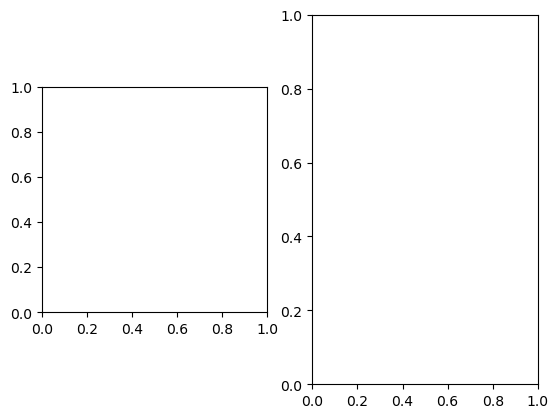

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# read the images
path = "D:\\courses\\IC201P design practicum\\Similar region\\"
name1 = "image 1.jpeg"
name2 = "image 2.jpeg"

img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )

axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )

plt.show ()

In [10]:
def template_matching (img1, img2, x1, l, n, w):
    # Get dimensions of img1
    v, h, _ = img1.shape
    
    # Calculate the coordinates of the top-left corner of the square template in img1
    x_tl = int((x1 + h) / 2 - l / 2)
    y_tl = int(v / 2 - l / 2)
    
    # Extract the square template from img1
    template = img1[y_tl:y_tl+l, x_tl:x_tl+l]
    
    # Create a list to store the coordinates of the random points in img1
    points_in_img1 = []
    
    # Generate n random points in the square template
    for i in range(n):
        x = np.random.randint(x_tl, x_tl+l)
        y = np.random.randint(y_tl, y_tl+l)
        points_in_img1.append((x, y))
    
    # Create a list to store the coordinates of the matched templates in img2
    points_in_img2 = []
    
    # Loop through each point in img1 and perform template matching in img2
    for point in points_in_img1:
        x, y = point
        template = img1[y-w//2:y+w//2, x-w//2:x+w//2]
        # Perform template matching with the img2 and template
        res = cv2.matchTemplate(img2, template, cv2.TM_CCOEFF_NORMED)
        
        # Get the coordinates of the matched template in img2
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        #match_x, match_y = max_loc
        #match_x += x - w
        #match_y += y - w
        
        top_left = max_loc
        match_x = top_left[0] + w//2
        match_y = top_left[1] + w//2
        
        # Add the matched coordinates to the list
        points_in_img2.append((match_x, match_y))
    
    for point in points_in_img1:
        cv2.circle(img1, point, radius=5, color=(0, 0, 255), thickness=-1)
    for point in points_in_img2:
        cv2.circle(img2, point, radius=5, color=(0, 0, 255), thickness=-1)
    fig , axs = plt.subplots ( 1,2 )
    axs[0].imshow ( img1 )
    axs[0].set_title ( "image 1" )
    axs[1].imshow ( img2 )
    axs[1].set_title ( "image 2" )
    plt.show ()
    
    return points_in_img1, points_in_img2


TypeError: Image data of dtype object cannot be converted to float

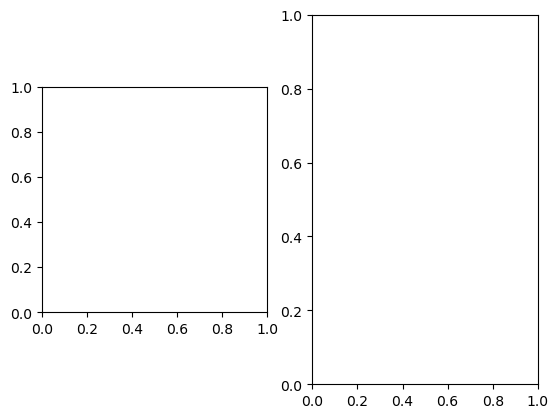

In [11]:
img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

# plot img1 and img2
fig , axs = plt.subplots ( 1,2 )
axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )
axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )
plt.show ()

x1 , n , l , w = x1 , 50 , 50 , 100

# plot new_img1 and new_img2
points_in_img1, points_in_img2 = template_matching (img1 = img1, img2 = img2, \
                                                    x1 = x1, l = l, n = n, w = w)
print (points_in_img1)
print ()
print (points_in_img2)

In [12]:
# to get the disparity from points_in_img1 and points_in_img2, we use a function.
Disparity = [ ( (points_in_img1[i][0] - points_in_img2[i][0])**2 + \
               (points_in_img1[i][1] - points_in_img2[i][1])**2 ) ** 0.5 \
             for i in range (len (points_in_img1)) ]
# we also know the values of T and Z. to calculate the list of values for ratio, we have,
T = 4
Z = 10 # or 15, 20...40
Ratio = [ Z*D/T for D in Disparity ]

NameError: name 'points_in_img1' is not defined

In [13]:
plt.plot (Ratio)
plt.show ()

NameError: name 'Ratio' is not defined

Now, we use some river images

Template Matching

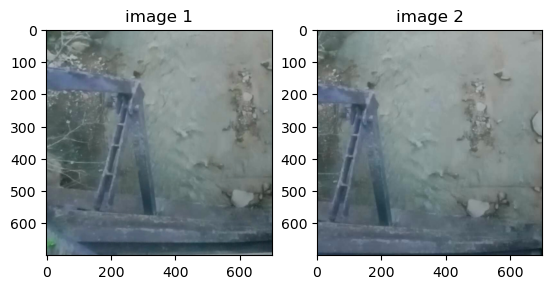

In [14]:
path = "D:\\courses\\IC201P design practicum\\Before Pre-open house\\Images of stereovision\\"
name1 = "last_frame30.jpeg"
name2 = "first_frame30.jpeg"

img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )

axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )

plt.show ()

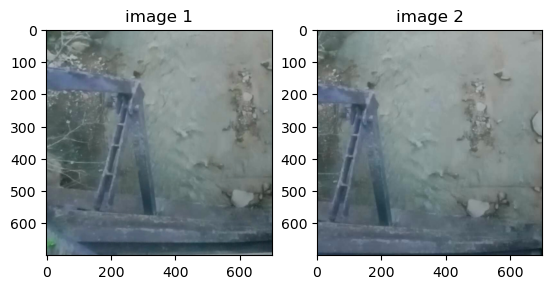

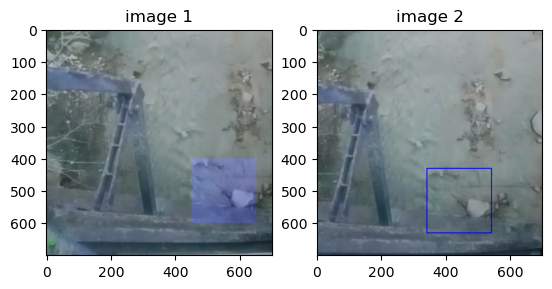

In [15]:
img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

# Define the point coordinates and window size
point = (550,500)
w = 200
# Perform template matching and display the result

# previous images
fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )

axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )

plt.show ()

new_img1 , new_img2 = individual_template_matching(img1, point, img2, w)

# new images

fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( new_img1 )
axs[0].set_title ( "image 1" )

axs[1].imshow ( new_img2 )
axs[1].set_title ( "image 2" )

plt.show ()

Common region

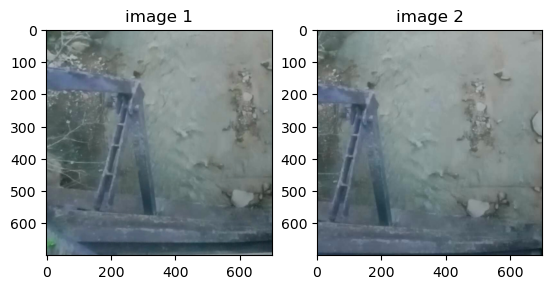

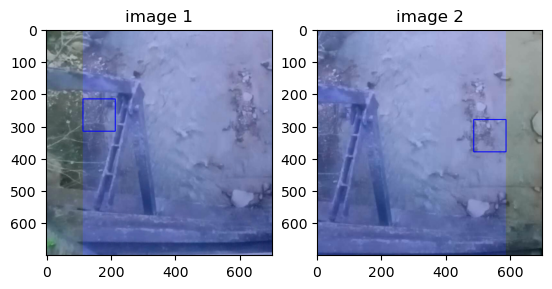

In [17]:
img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

# first plot the img1 and img2, then plot new_img1 and new_img2

# plot img1 and img2

fig , axs = plt.subplots ( 1,2 )
axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )
axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )
plt.show ()

h , v = 100, 100

# plot new_img1 and new_img2
new_img1 , new_img2 , _ , _ = common_area ( img1 , img2 , h = h , v = v )

fig , axs = plt.subplots ( 1,2 )
axs[0].imshow ( new_img1 )
axs[0].set_title ( "image 1" )
axs[1].imshow ( new_img2 )
axs[1].set_title ( "image 2" )
plt.show ()

Stereovision

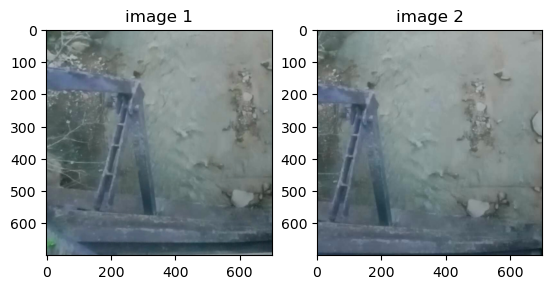

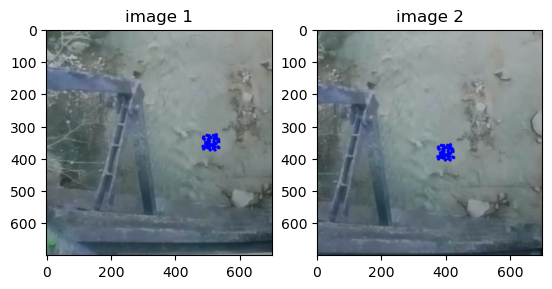

[(506, 365), (513, 358), (498, 329), (526, 354), (505, 330), (504, 330), (502, 368), (487, 337), (488, 334), (520, 352), (522, 364), (508, 374), (496, 355), (500, 363), (530, 340), (500, 350), (504, 339), (521, 352), (518, 329), (502, 353), (525, 331), (532, 365), (494, 351), (535, 367), (532, 346), (520, 346), (505, 351), (521, 339), (518, 370), (534, 342), (488, 371), (486, 363), (511, 336), (527, 327), (529, 338), (521, 355), (508, 361), (501, 359), (490, 341), (517, 361), (527, 329), (494, 356), (533, 343), (502, 342), (523, 374), (506, 346), (533, 348), (505, 364), (494, 366), (535, 348)]

[(394, 396), (400, 389), (385, 360), (413, 385), (392, 361), (391, 361), (390, 399), (375, 368), (376, 365), (407, 383), (410, 395), (397, 405), (384, 387), (388, 395), (416, 371), (388, 381), (391, 370), (408, 383), (404, 360), (389, 384), (411, 362), (420, 396), (382, 383), (423, 398), (418, 377), (406, 377), (392, 382), (407, 370), (406, 401), (420, 373), (376, 402), (374, 395), (398, 367), (

In [18]:
img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

# plot img1 and img2
fig , axs = plt.subplots ( 1,2 )
axs[0].imshow ( img1 )
axs[0].set_title ( "image 1" )
axs[1].imshow ( img2 )
axs[1].set_title ( "image 2" )
plt.show ()

x1 , n , l , w = x1 , 50 , 50 , 100

# plot new_img1 and new_img2
points_in_img1, points_in_img2 = template_matching (img1 = img1, img2 = img2, \
                                                    x1 = x1, l = l, n = n, w = w)
print (points_in_img1)
print ()
print (points_in_img2)

In [19]:
# to get the disparity from points_in_img1 and points_in_img2, we use a function.
Disparity = [ ( (points_in_img1[i][0] - points_in_img2[i][0])**2 + \
               (points_in_img1[i][1] - points_in_img2[i][1])**2 ) ** 0.5 \
             for i in range (len (points_in_img1)) ]
# we also know the values of T and Z. to calculate the list of values for ratio, we have,
T = 4
Z = 10 # or 15, 20...40
Ratio = [ Z*D/T for D in Disparity ]

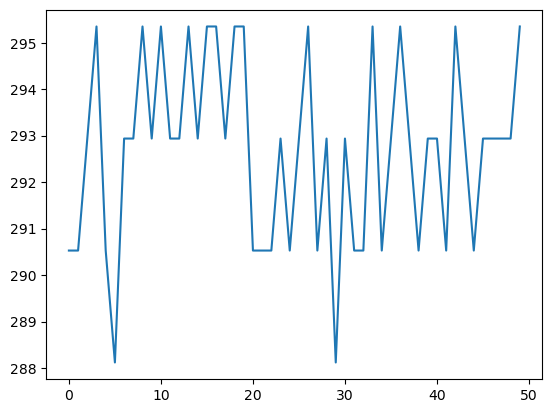

In [18]:
plt.plot (Ratio)
plt.show ()

Use multiple images

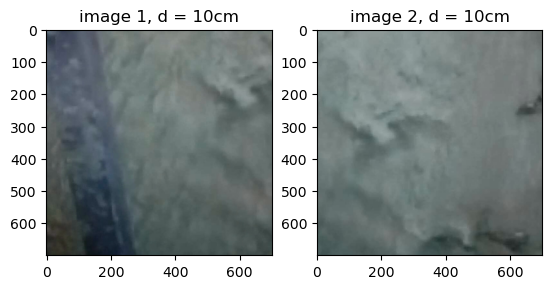

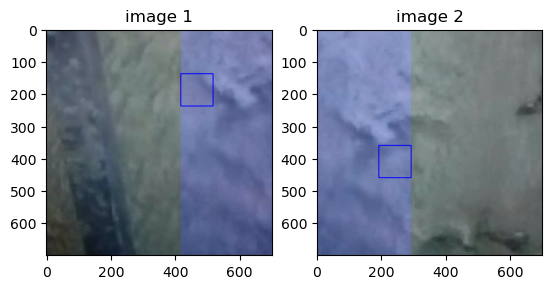

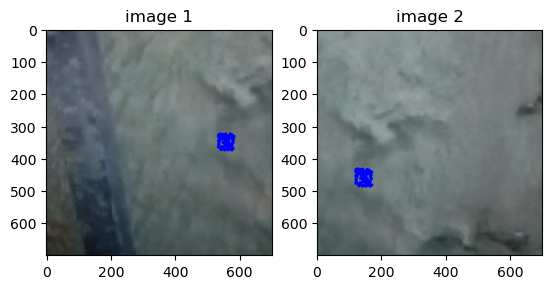

--------------------------------------------------------------------------------


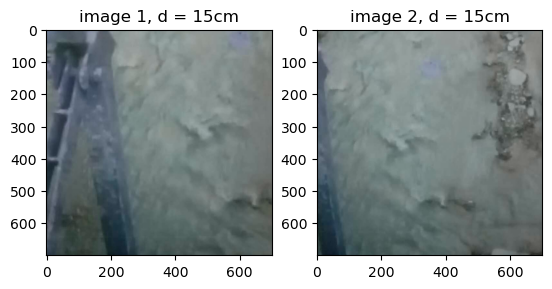

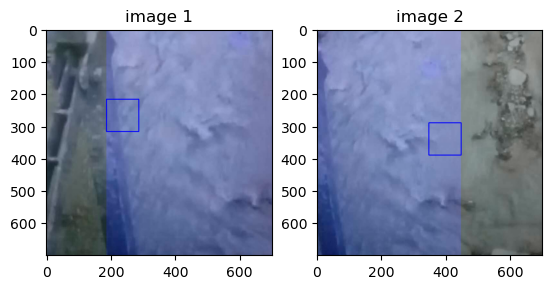

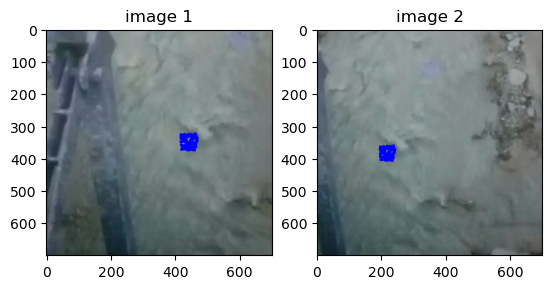

--------------------------------------------------------------------------------


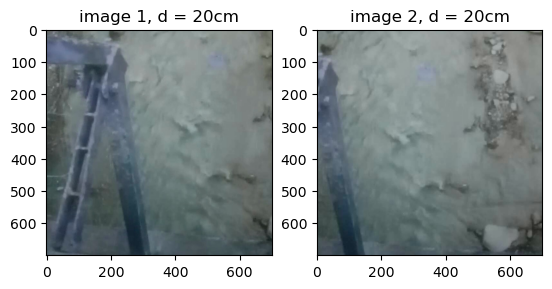

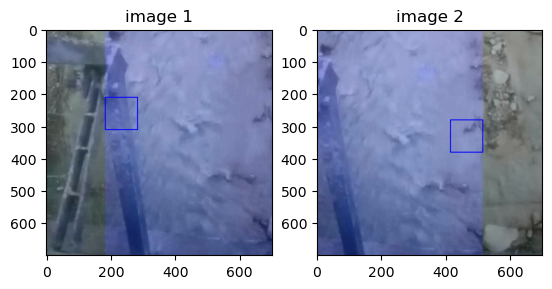

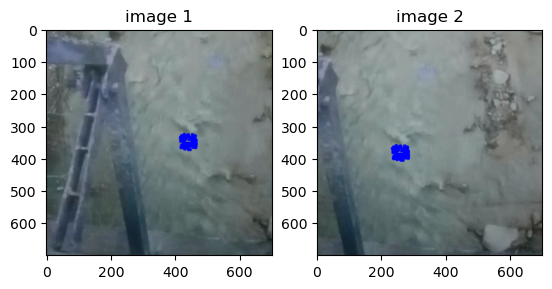

--------------------------------------------------------------------------------


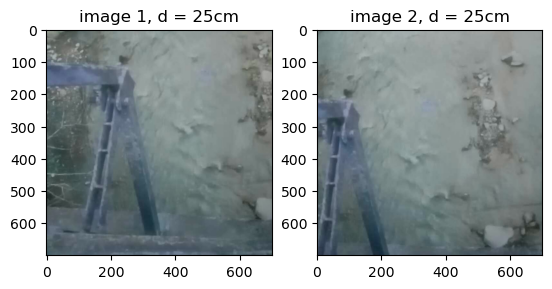

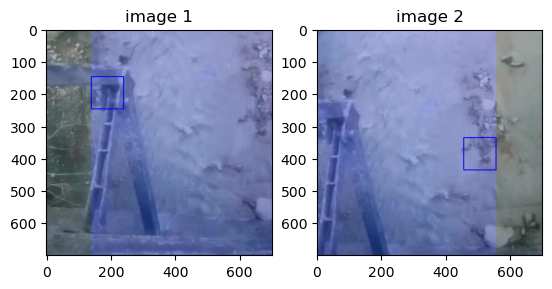

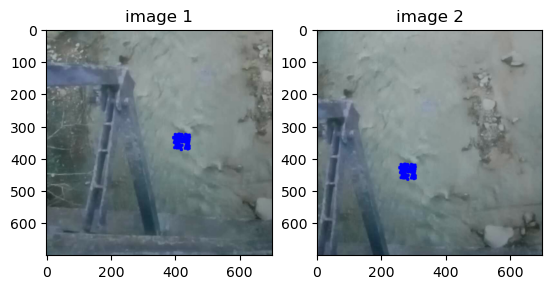

--------------------------------------------------------------------------------


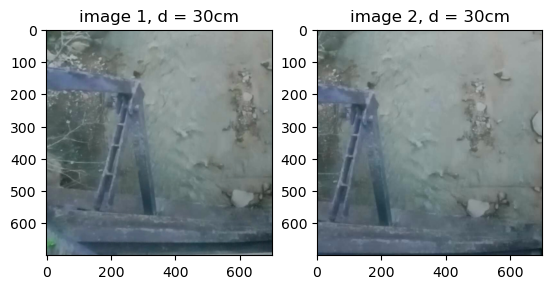

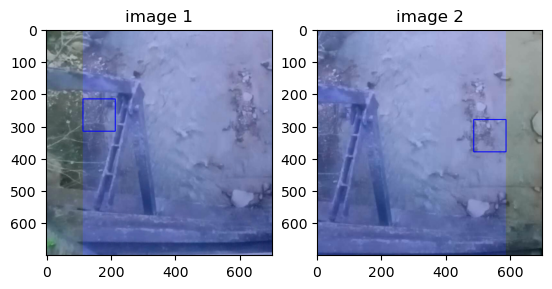

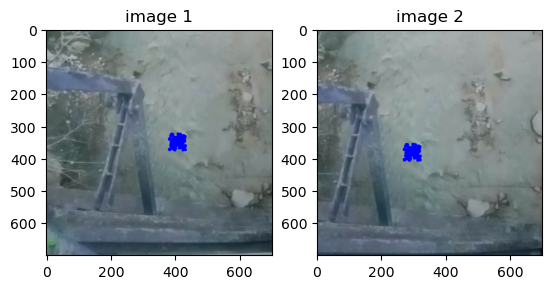

--------------------------------------------------------------------------------


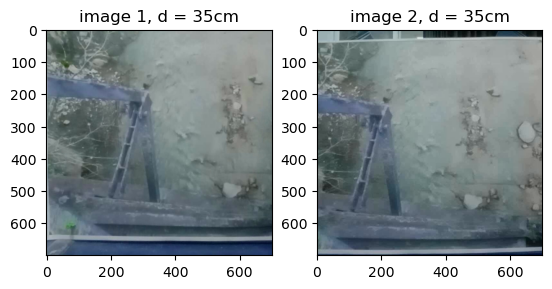

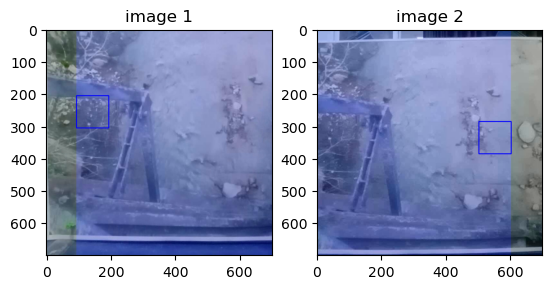

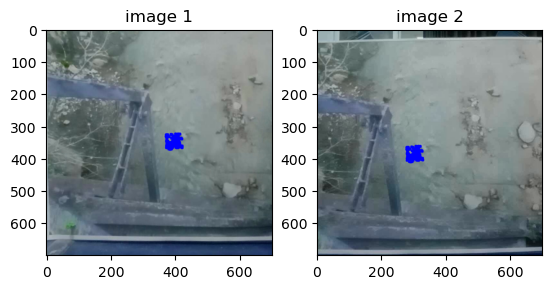

--------------------------------------------------------------------------------


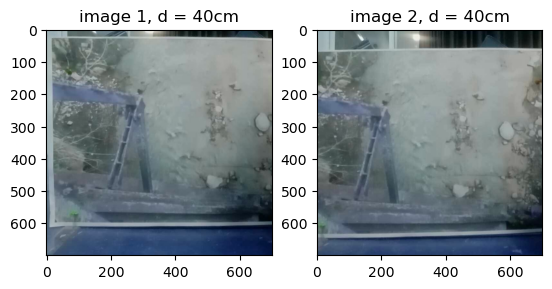

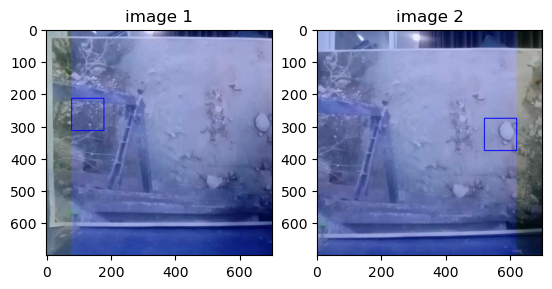

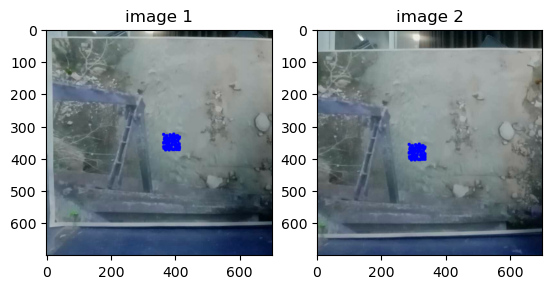

--------------------------------------------------------------------------------


In [19]:
list_of_Z = [ i for i in range ( 10 , 41 , 5 ) ]
list_of_ratios = []

for i in range (10 , 41 , 5):
    name1 = "last_frame" + str(i) + ".jpeg"
    name2 = "first_frame" + str(i) + ".jpeg"
    
    img1 = cv2.imread ( path + name1 )
    img2 = cv2.imread ( path + name2 )
    
    fig , axs = plt.subplots ( 1,2 )
    
    axs[0].imshow ( img1 )
    axs[0].set_title ( f"image 1, d = {i}cm" )
    
    axs[1].imshow ( img2 )
    axs[1].set_title ( f"image 2, d = {i}cm" )
    
    plt.show ()
    
    h , v = 100, 100

    # plot new_img1 and new_img2
    new_img1 , new_img2 , x1 , _ = common_area ( img1 , img2 , h = h , v = v )

    fig , axs = plt.subplots ( 1,2 )
    axs[0].imshow ( new_img1 )
    axs[0].set_title ( "image 1" )
    axs[1].imshow ( new_img2 )
    axs[1].set_title ( "image 2" )
    plt.show ()
    
    img1 = cv2.imread ( path + name1 )
    img2 = cv2.imread ( path + name2 )
    
    x1 , n , l , w = x1 , 100 , 50 , 100
    
    # plot new_img1 and new_img2
    points_in_img1, points_in_img2 = template_matching (img1 = img1, img2 = img2, \
                                                    x1 = x1, l = l, n = n, w = w)
    
    # to get the disparity from points_in_img1 and points_in_img2, we use a function.
    Disparity = [ ( (points_in_img1[i][0] - points_in_img2[i][0])**2 + \
                   (points_in_img1[i][1] - points_in_img2[i][1])**2 ) ** 0.5 \
                 for i in range (len (points_in_img1)) ]
    # we also know the values of T and Z. to calculate the list of values for ratio, we have,
    T = 4
    Z = i
    Ratio = [ Z*D/T for D in Disparity ]
    list_of_ratios.append (Ratio)
    print ( '-'*80 )

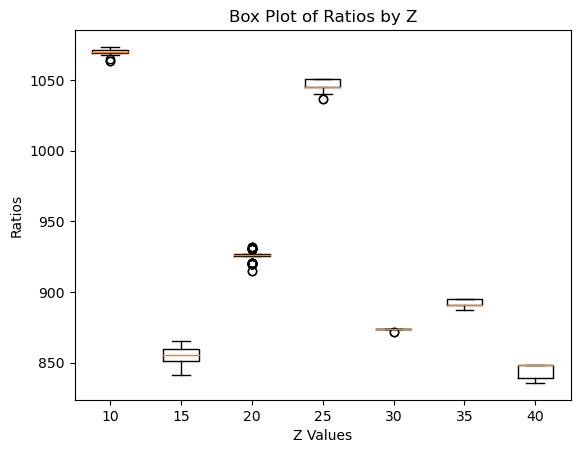

In [20]:
# Now, to plot a box plot,
# Create the box plot
fig, ax = plt.subplots()
ax.boxplot(list_of_ratios)

# Set the x ticks and labels
ax.set_xticks(range(1, len(list_of_Z) + 1))
ax.set_xticklabels(list_of_Z)

# Set the plot title and axis labels
ax.set_title('Box Plot of Ratios by Z')
ax.set_xlabel('Z Values')
ax.set_ylabel('Ratios')

# Display the plot
plt.show()

In [21]:
np.array (list_of_ratios[4]).mean ()

873.5725752246581

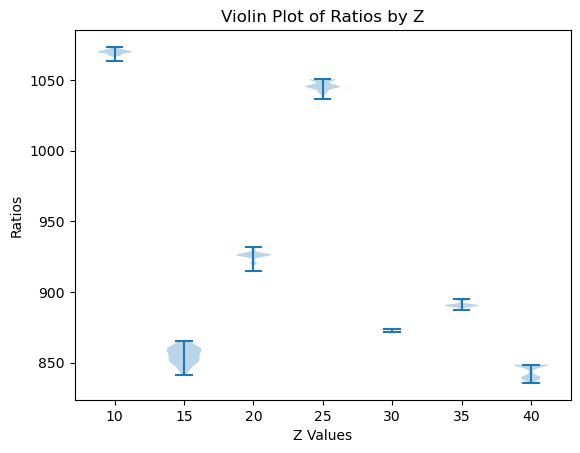

In [22]:
# Create the violin plot
fig, ax = plt.subplots()
ax.violinplot(list_of_ratios)

# Set the x ticks and labels
ax.set_xticks(range(1, len(list_of_Z) + 1))
ax.set_xticklabels(list_of_Z)

# Set the plot title and axis labels
ax.set_title('Violin Plot of Ratios by Z')
ax.set_xlabel('Z Values')
ax.set_ylabel('Ratios')

# Display the plot
plt.show()

Finding height from disparity.

In [23]:
def height_from_diaparity ( disparity, T , f_d ):
    height_list = []
    for D in disparity:
        height_list.append ( f_d * T / D )
    
    height_list = np.array ( height_list )
    return height_list.mean() , height_list.std ()

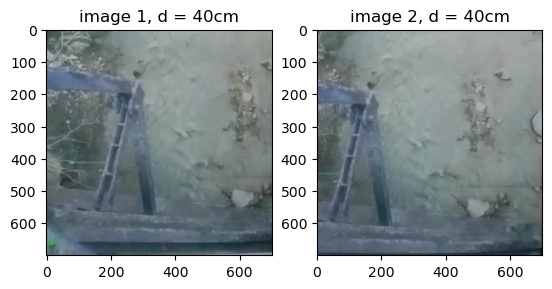

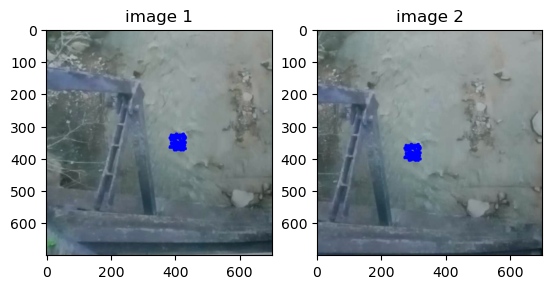

Height mean = 29.999 , Height std = 0.015


In [24]:
# to check this using an image.
name1 = "last_frame" + str(30) + ".jpeg"
name2 = "first_frame" + str (30) + ".jpeg"
img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )
fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( img1 )
axs[0].set_title ( f"image 1, d = {i}cm" )

axs[1].imshow ( img2 )
axs[1].set_title ( f"image 2, d = {i}cm" )

plt.show ()

h , v = 100, 100
# plot new_img1 and new_img2
new_img1 , new_img2 , x1 , _ = common_area ( img1 , img2 , h = h , v = v )

x1 , n , l , w = x1 , 100 , 50 , 100

img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )
# plot new_img1 and new_img2
points_in_img1, points_in_img2 = template_matching (img1 = img1, img2 = img2, \
                                                x1 = x1, l = l, n = n, w = w)

# to get the disparity from points_in_img1 and points_in_img2, we use a function.
Disparity = [ ( (points_in_img1[i][0] - points_in_img2[i][0])**2 + \
               (points_in_img1[i][1] - points_in_img2[i][1])**2 ) ** 0.5 \
             for i in range (len (points_in_img1)) ]

height_mean , height_std = height_from_diaparity ( disparity = Disparity , T = 4 , f_d = 873.491 )

print ( f"Height mean = {round (height_mean,3)} , Height std = {round (height_std,3)}" )

Finding real distance

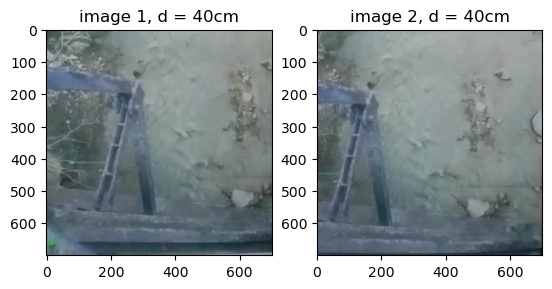

In [25]:
name1 = "last_frame" + str(30) + ".jpeg"
name2 = "first_frame" + str (30) + ".jpeg"
img1 = cv2.imread ( path + name1 )
img2 = cv2.imread ( path + name2 )

fig , axs = plt.subplots ( 1,2 )

axs[0].imshow ( img1 )
axs[0].set_title ( f"image 1, d = {i}cm" )

axs[1].imshow ( img2 )
axs[1].set_title ( f"image 2, d = {i}cm" )

plt.show ()

In [26]:
img1.shape

(700, 700, 3)

In [27]:
import numpy as np
def distance_from_height ( img , height , point , f_d ):
    # to get the disparity between the middle point and the given point.
    middle_point = img.shape[1]//2 , img.shape[0]//2
    D = ( (point[0] - middle_point[0])**2 + (point[1] - middle_point[1])**2 )**0.5
    T_H = D/f_d
    L = height * np.tan ( T_H )
    
    Z_calculated = ( L**2 + height**2 )**0.5
    return Z_calculated

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


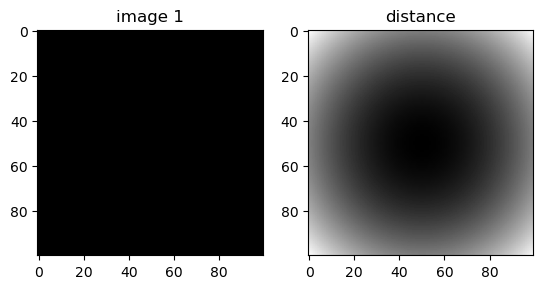

In [28]:
size = 100
image = np.zeros( (size , size) )
print ( image )
fig , axs = plt.subplots ( 1,2 )
axs[0].imshow ( image , cmap = "gray" )
axs[0].set_title ( "image 1" )

f_d = 1000
height = 10 # in meters

for x in range(size):
    for y in range(size):
        point = (x, y)
        image[x, y] = distance_from_height(img=image, height=height, point=point, f_d=f_d)

image_norm = (image - np.min(image)) / (np.max(image) - np.min(image))
# Scale the image to values between 0 and 255
image_scale = image_norm * 255

# Round the values to the nearest integer and convert to integer type
image_int = np.round(image_scale).astype(int)

axs[1].imshow ( image_int , cmap = "gray" )
axs[1].set_title ( "distance" )
plt.show ()

In [29]:
# to find the distances associated with each pixel a real image, and to plot that image.
# first find the common area
# then, use the algorithm for finding distance associated with each point
# now, make a black and white image from this, and plot the image.
# then, plot the common area

_ , _ , x1 , _ = common_area ( h = 100 , v = 100 )
delta_y = 70
cropped_image1 = img1 [ delta_y:-delta_y , x1 : ]

points_in_cropped_img1 = # give points
w = 100 # window size

# Create a list to store the coordinates of the matched templates in img2
points_in_img2 = []

# Loop through each point in img1 and perform template matching in img2
for point in points_in_cropped_img1:
    x, y = point
    template = img1[y-w//2:y+w//2, x-w//2:x+w//2]
    # Perform template matching with the img2 and template
    res = cv2.matchTemplate(img2, template, cv2.TM_CCOEFF_NORMED)

    # Get the coordinates of the matched template in img2
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    #match_x, match_y = max_loc
    #match_x += x - w
    #match_y += y - w

    top_left = max_loc
    match_x = top_left[0] + w//2
    match_y = top_left[1] + w//2

    # Add the matched coordinates to the list
    points_in_img2.append((match_x, match_y))
    
# to get the disparity from points_in_img1 and points_in_img2, we use a function.
Disparity = [ ( (points_in_img1[i][0] - points_in_img2[i][0])**2 + \
               (points_in_img1[i][1] - points_in_img2[i][1])**2 ) ** 0.5 \
             for i in range (len (points_in_img1)) ]

SyntaxError: invalid syntax (2951560087.py, line 11)